# Data Preprocessing for Baseline Model

Project: **Predicting Shipment Outcomes and Inferring Causes of Potential Disruptions**  
Created by: **Fauzan Pasaribu**

The objective of the project is to create a model that can predict the shipment outcome of a particular order item. If the model predicts that the shipment of the order item encounters disruptions, the model would then deduce the causes of such disruption.

**The aim of this notebook is to preprocess the cleaned dataset to make it ready for modelling our baseline model.**

# Contents
1. [Data Dictionary](#Data-Dictionary)<br>
3. [Data Loading](#Data-Loading)<br>
4. [Data Wrangling](#Data-Wrangling)<br>
5. [Understanding the Dataset](#Understanding-the-Dataset)<br>
6. [Data Preprocessing](#Data-Preprocessing)<br>
    a. [Feature Engineering](#Feature-Engineering)<br>

## Data Dictionary

The data dictionary reflects only the fields that made it through the cleaning process. The original dataset can be found [here](https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis).

FIELDS                       |DESCRIPTION                                                                                                                                                                                                                                                                                                                                                                                    
-----------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Type                         |  Type of transaction made                                                                                                                                                                                                                                                                                                                                                                    
Days for shipping (real)     |  Actual shipping days of the purchased product                                                                                                                                                                                                                                                                                                                                               
Days for shipment (scheduled)|  Days of scheduled delivery of the purchased product                                                                                                                                                                                                                                                                                                                                         
Benefit per order            |  Earnings per order placed                                                                                                                                                                                                                                                                                                                                                                   
Sales per customer           |  Total sales per customer made per customer                                                                                                                                                                                                                                                                                                                                                  
Delivery Status              |  Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time                                                                                                                                                                                                                                                                                          
Late_delivery_risk           |  Categorical variable that indicates if sending is late (1), it is not late (0).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
Category Name                |  Description of the product category                                                                                                                                                                                                                                                                                                                                                         
Customer City                |  City where the customer made the purchase                                                                                                                                                                                                                                                                                                                                                   
Customer Country             |  Country where the customer made the purchase                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
Customer Id                  |  Customer ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
Customer Segment             |  Types of Customers: Consumer , Corporate , Home Office                                                                                                                                                                                                                                                                                                                                     
Customer State               |  State to which the store where the purchase is registered belongs                                                                                                                                                                                                                                                                                                                           
Customer Street              |  Street to which the store where the purchase is registered belongs                                                                                                                                                                                                                                                                                                                          
Customer Zipcode             |  Customer Zipcode                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
Department Name              |  Department name of store                                                                                                                                                                                                                                                                                                                                                                   
Latitude                     |  Latitude corresponding to location of store                                                                                                                                                                                                                                                                                                                                                 
Longitude                    |  Longitude corresponding to location of store                                                                                                                                                                                                                                                                                                                                                
Market                       |  Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA                                                                                                                                                                                                                                                                                                      
Order City                   |  Destination city of the order                                                                                                                                                                                                                                                                                                                                                               
Order Country                |  Destination country of the order                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
order date (DateOrders)      |  Date on which the order is made                                                                                                                                                                                                                                                                                                                                                             
Order Id                     |  Order code                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
Order Item Discount          |  Order item discount value                                                                                                                                                                                                                                                                                                                                                                   
Order Item Discount Rate     |  Order item discount percentage                                                                                                                                                                                                                                                                                                                                                              
Order Item Id                |  Order item code                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
Order Item Profit Ratio      |  Order Item Profit Ratio                                                                                                                                                                                                                                                                                                                                                                     
Order Item Quantity          |  Number of products per order                                                                                                                                                                                                                                                                                                                                                                
Sales                        |  Value in sales                                                                                                                                                                                                                                                                                                                                                                              
Order Item Total             |  Total amount per order                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
Order Region                 |  Region of the world where the order is delivered :  Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia ,  Europe , Central America, Eastern Europe , South of  USA
Order State                  |  State of the region where the order is delivered                                                                                                                                                                                                                                                                                                                                            
Order Status                 |  Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
Product Name                 |  Product Name                                                                                                                                                                                                                                                                                                                                                                                
Product Price                |  Product Price                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
Shipping date (DateOrders)   |  Exact date and time of shipment                                                                                                                                                                                                                                                                                                                                                             
Shipping Mode                |  The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day                                                                                                                                                                                                                                                                                         

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignores warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading data
df = pd.read_csv("Datasets\clean_DataCoSupplyChainDataset.csv")

In [3]:
#view data
df.sample(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
56620,DEBIT,4,4,35.990002,119.970001,Shipping on time,0,Shop By Sport,Caguas,Puerto Rico,...,3,119.970001,119.970001,Central America,Panamá,COMPLETE,Under Armour Girls' Toddler Spine Surge Runni,39.990002,2015-01-22 13:06:00,Standard Class
126646,PAYMENT,3,4,13.440000,48.000000,Advance shipping,0,Women's Apparel,Caguas,Puerto Rico,...,1,50.000000,48.000000,Northern Europe,Inglaterra,PENDING_PAYMENT,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2015-08-03 21:36:00,Standard Class
174052,CASH,5,4,-3.690000,45.000000,Late delivery,1,Women's Apparel,Caguas,Puerto Rico,...,1,50.000000,45.000000,Central Asia,Bishkek,CLOSED,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2017-01-14 01:14:00,Standard Class
157218,TRANSFER,1,0,-92.900002,278.980011,Late delivery,1,Camping & Hiking,Caguas,Puerto Rico,...,1,299.980011,278.980011,Caribbean,Granma,PENDING,Diamondback Women's Serene Classic Comfort Bi,299.980011,2017-03-25 10:30:00,Same Day
177060,DEBIT,1,0,116.980003,299.950012,Late delivery,1,Cleats,Caguas,Puerto Rico,...,5,299.950012,299.950012,Western Europe,Groningen,COMPLETE,Perfect Fitness Perfect Rip Deck,59.990002,2015-08-01 01:53:00,Same Day


In [4]:
df.shape

(180516, 37)

After cleaning, our dataset has **180,516 observations (rows)** and **37 features (columns)**

## Data Wrangling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180516 entries, 0 to 180515
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180516 non-null  object 
 1   Days for shipping (real)       180516 non-null  int64  
 2   Days for shipment (scheduled)  180516 non-null  int64  
 3   Benefit per order              180516 non-null  float64
 4   Sales per customer             180516 non-null  float64
 5   Delivery Status                180516 non-null  object 
 6   Late_delivery_risk             180516 non-null  int64  
 7   Category Name                  180516 non-null  object 
 8   Customer City                  180516 non-null  object 
 9   Customer Country               180516 non-null  object 
 10  Customer Id                    180516 non-null  int64  
 11  Customer Segment               180516 non-null  object 
 12  Customer State                

The data type of that was casted in the data preparation process is not reflected here. I am going to cast them again before processing the data just like I did in the data preparation process. Here are the wrangling steps:

1. `shipping date (DateOrders)` : object -> datetime
    
2. `order date (DateOrders)` : object -> datetime
    
3. `Customer Id` : int -> object
    
4. `Customer Zipcode` : int -> object
    
5. `Order Id` : int -> object
    
6. `Order Item Id` : int -> object

In [6]:
#convert shipping date (DateOrders) to datetime data type
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"])
#convert order date (DateOrders) to datetime data type
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])
#convert all ID columns and Zipcodes to object data type
ID_columns = ["Customer Id", "Order Id", "Order Item Id", "Customer Zipcode"]
df[ID_columns] = df[ID_columns].astype("object")

In [7]:
#sanity check: now all ID columns and Zipcodes are object dtype, and date columns are datetime dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180516 entries, 0 to 180515
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180516 non-null  object        
 1   Days for shipping (real)       180516 non-null  int64         
 2   Days for shipment (scheduled)  180516 non-null  int64         
 3   Benefit per order              180516 non-null  float64       
 4   Sales per customer             180516 non-null  float64       
 5   Delivery Status                180516 non-null  object        
 6   Late_delivery_risk             180516 non-null  int64         
 7   Category Name                  180516 non-null  object        
 8   Customer City                  180516 non-null  object        
 9   Customer Country               180516 non-null  object        
 10  Customer Id                    180516 non-null  object        
 11  

## Understanding the Dataset

Before the actual processing of the dataset, let's fully understand our dataset. The dataset entails information of order items that are delivered from the "customer" (the entity who made purchase of the delivery - origin of shipment) to the "order customer" (the entity who made the order - destination of shipment). Now let's dive deeper by first understanding what one row of observation represent, then understanding each of the features in our dataset, and understand, if any, how the features are related to each other.

##### What does each row of observation represent?

To answer this question, let's look at all our features and count the unique values of each: 

In [8]:
df.nunique().sort_values(ascending=False)

Order Item Id                    180516
order date (DateOrders)           65749
Order Id                          65749
shipping date (DateOrders)        63699
Benefit per order                 21998
Customer Id                       20649
Latitude                          11248
Customer Street                    7456
Longitude                          4485
Order City                         3597
Order Item Total                   2927
Sales per customer                 2927
Order State                        1089
Order Item Discount                1017
Customer Zipcode                    995
Customer City                       562
Sales                               193
Order Country                       164
Order Item Profit Ratio             162
Product Name                        118
Product Price                        75
Category Name                        50
Customer State                       44
Order Region                         23
Order Item Discount Rate             18


From here, I notice that `Order Item Id` has the same number of unique values as the number of rows the dataset has: **180,516**

In [9]:
df.shape

(180516, 37)

This means that the `Order Item Id` can be the index of the dataset, and one row represents one `Order Item Id`. I am going to set the index to that column.

In [10]:
#setting the index of the dataset to order item id
df = df.set_index("Order Item Id")

In [11]:
#sanity check: now the index is the order item id
df.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
Order Item Id,,,,,,,,,,,,,,,,,,,,,
180517,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,...,1,327.75,314.640015,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2018-02-03 22:56:00,Standard Class
179254,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,1,327.75,311.359985,South Asia,Rajastán,PENDING,Smart watch,327.75,2018-01-18 12:27:00,Standard Class
179253,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,...,1,327.75,309.720001,South Asia,Rajastán,CLOSED,Smart watch,327.75,2018-01-17 12:06:00,Standard Class


We haven't answered the question of what each row mean yet. In a glance, one might think that each row may represent one order. That cannot be true because there is a seperate Id for the orders, `Order Id`, and the number of unique values of that column does not match the number of observations of the dataset. To answer the question, we have to know what `Order Item Id` exactly means. According to the data dictionary, it just means the "code of the order item". *An "order item" is an individual unique item within an order placed*. This means that one order can contain multiple order items. With that, we now know that **one row of observation in our dataset represents one unique item of an order**.

##### What do the Features Mean and How are They Related?

Some of the features are very straightforward where the feature name and description from the data dictionary is very descriptive of the feature itself. We are not interested in those. Let's instead identify which features needs further elaboration of what it actually means.

These are the features and its dictionary meaning that I want to explore more on due to its ambiguity:

- `Days for shipping (real)` - Actual shipping days of the purchased product
- `Days for shipment (scheduled)` - Days of scheduled delivery of the purchased product
- `Delivery Status` - Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time
- `Late_delivery_risk` - Categorical variable that indicates if sending is late (1), it is not late (0).
- `Order Item Total` - Total amount per order 
- `Sales per customer` - Total sales per customer made per customer                                        
- `Sales` - Value in sales     

#### Days for shipping (real) vs. Days for shipment (scheduled) -> Delivery Status

From my understanding of the dictionary definition, `Days for shipping (real)` is the actual number of days the order shipment took to arrive to the destination. On the other hand `Days for shipment (scheduled)` is the scheduled number of days the order shipment will take to arrive to the destination. If my understanding is correct, then if **real days > scheduled days, then delivery is late** because the delivery cannot be on time or arrive earlier than scheduled. Let's test that hypothesis by looking whether that condition would always give a **"Late delivery"** in the `Delivery Status` variable.

In [12]:
#returns unique variables of Delivery Status where real>scheduled
df[((df["Days for shipping (real)"] - df["Days for shipment (scheduled)"]) > 0)]["Delivery Status"].unique() 

array(['Late delivery', 'Shipping canceled'], dtype=object)

My hypothesis is correct! **When real days > scheduled days, the delivery is late**. However, it **can also be canceled**. Therefore, it is true that the meaning of `Days for shipping (real)` is the actual number of days the order shipment took to arrive to the destination and `Days for shipment (scheduled)` is the scheduled number of days the order shipment will take to arrive to the destination.

#### Delivery Status: What is "Advance shipping" and "Shipping on time"?

We now know that late delivery or canceled shipping occurs when the actual number of days for shipping exceeds the number of sheduled days for the shipment. Now, what does the other two `Delivery Status` mean? Let's attempt using `Days for shipping (real)` and `Days for shipment (scheduled)` again to understand what **"Advance shipping"** and **"Shipping on time"** actually mean.

In [13]:
#make a copy of original df
df_temp = df.copy()
#makes a column for real - shipment in temporary dataframe
df_temp["Real-Scheduled"] = df["Days for shipping (real)"] - df["Days for shipment (scheduled)"]

In [14]:
#shows real-scheduled of only advance shipping 
df_temp[df_temp["Delivery Status"] == "Advance shipping"]["Real-Scheduled"].sample(15)

Order Item Id
54027    -1
73430    -2
175732   -1
33725    -2
2733     -1
81708    -2
118838   -2
4530     -1
170383   -1
168714   -2
83048    -2
16931    -2
30702    -2
29695    -1
104231   -1
Name: Real-Scheduled, dtype: int64

From here, we can see that **Advance shipping** occurs when real days is less than scheduled days (the negative values shows real < scheduled) meaning the the order is delivered at least a day early. Let's verify this by looking whether this is always true.

In [15]:
#returns unique variables of Delivery Status where real<scheduled
df[((df["Days for shipping (real)"] - df["Days for shipment (scheduled)"]) < 0)]["Delivery Status"].unique() 

array(['Advance shipping', 'Shipping canceled'], dtype=object)

We found that **Advance shipping** only occurs when real days is less than scheduled days. We also made a surprising finding that when real days is less than scheduled days, **shipping can also be canceled**.

In [16]:
#shows real-scheduled of only shipping on time 
df_temp[df_temp["Delivery Status"] == "Shipping on time"]["Real-Scheduled"].sample(15)

Order Item Id
165696    0
67920     0
52643     0
24131     0
11515     0
134686    0
141259    0
22513     0
91838     0
171002    0
62258     0
35773     0
131186    0
135709    0
162527    0
Name: Real-Scheduled, dtype: int64

From here, we can see that **Shipping on time** occurs when real days is equls to scheduled days (the 0 values shows real = scheduled) meaning the the order is delivered at on the day it was scheduled to. Let's verify this by looking whether this is always true.

In [17]:
#returns unique variables of Delivery Status where real=scheduled
df[((df["Days for shipping (real)"] - df["Days for shipment (scheduled)"]) == 0)]["Delivery Status"].unique() 

array(['Shipping on time', 'Shipping canceled'], dtype=object)

We found that **Shipping on time** only occurs when real days is equals to the scheduled days. We also made a surprising finding that **shipping can also be canceled** when real days is equals to the scheduled days.

On this note, it would not be possible to use **Days for shipping (real)**  as a feature variable, since it is only known after the delivery is completed. Hence, **`Days for shipping (real)` should be dropped.**

In [18]:
df.drop("Days for shipping (real)", inplace=True, axis=1)

#### Is Late_delivery_risk Related to Delivery Status?

From the EDA document, we saw that `Late_delivery_risk` is always 1 when `Delivery Status` is "Late delivery" and 0 otherwise. Let's verify that.

In [19]:
#returns unique variables of Delivery Status where late delivery risk is 1
df[(df["Late_delivery_risk"] == 1)]["Delivery Status"].unique() 

array(['Late delivery'], dtype=object)

`Late_delivery_risk is`, in fact, always 1 when `Delivery Status` is "Late delivery"

In [20]:
#returns unique variables of Delivery Status where late delivery risk is 0
df[(df["Late_delivery_risk"] == 0)]["Delivery Status"].unique() 

array(['Advance shipping', 'Shipping on time', 'Shipping canceled'],
      dtype=object)

`Late_delivery_risk` is, in fact, always 0 when Delivery Status is **not** "Late delivery"

Because the feature directly derives from our target, **this column should be dropped!** It is not a predictor of the target variable at all if it is a derivated of the target.

In [21]:
#dropping Late_delivery_risk column
df.drop("Late_delivery_risk", inplace=True, axis=1)

#### Order Item Total

The dictionary definition of this feature is "Total amount per order". This does not really explain a lot. Let's see how it relates to other features that also has "Order Item" in its feature name as well as other money-related columns.

In [22]:
df[["Order Item Total", "Order Item Discount Rate", "Order Item Discount", "Order Item Quantity", "Order Item Profit Ratio", "Product Price"]].sample(10)

,Order Item Total,Order Item Discount Rate,Order Item Discount,Order Item Quantity,Order Item Profit Ratio,Product Price
Order Item Id,,,,,,
15014,327.980011,0.18,72.000000,1,0.28,399.980011
37025,224.990005,0.25,75.000000,1,0.33,299.980011
96763,120.000000,0.04,5.000000,5,0.45,25.000000
141051,122.839996,0.06,7.150000,1,-0.10,129.990005
162504,251.960007,0.16,47.990002,5,0.36,59.990002
165669,120.000000,0.20,30.000000,3,0.08,50.000000
32825,93.000000,0.07,7.000000,2,0.11,50.000000
70304,371.980011,0.07,28.000000,1,0.48,399.980011
132255,169.990005,0.15,30.000000,1,-0.19,199.990005


From here, I notice that the `Product Price` multplied by the `Order Item Quantity` then subtracted by `Order Item Discount` gets us the `Order Item Total`. In other words:

**Order Item Total = (Product Price x Order Item Quantity) - Order Item Discount**

Let's test that out:

In [23]:
#temporary df
df_temp = df.copy()

df_temp["(PP*OIQ)-OID"] = (df["Product Price"] * df["Order Item Quantity"]) - df["Order Item Discount"]

df_temp[df_temp["Order Item Quantity"] == 2][["Order Item Total", "(PP*OIQ)-OID"]].sample(10)

,Order Item Total,(PP*OIQ)-OID
Order Item Id,,
34047,111.580002,111.580004
1300,118.779999,118.780003
159303,98.379997,98.380003
82927,104.379997,104.380003
32002,105.580002,105.580004
155723,91.000000,91.000000
115690,90.959999,90.959999
76814,109.180000,109.180003
163948,113.379997,113.380003


We get equal numbers using the equation I discovered and the actual `Order Item Total`. Therefore, `Product Price`, `Order Item Discount`, and `Order Item Quantity` are directly related to `Order Item Total`.

**What is Sales and Sales per customer?**

Here, I want to undestand what `Sales` means and how it differs with `Sales per customer`

In [24]:
df[df["Sales"] != df["Product Price"]][["Sales", "Product Price", "Order Item Quantity"]]

,Sales,Product Price,Order Item Quantity
Order Item Id,,,
71956,119.980003,59.990002,2
113598,79.980003,39.990002,2
77757,100.000000,50.000000,2
114401,79.980003,39.990002,2
119405,100.000000,50.000000,2
...,...,...,...
146878,299.950012,59.990002,5
140507,299.950012,59.990002,5
149029,299.950012,59.990002,5


I noticed that `Product Price` and `Order Item Quantity` has a relation to `Sales`. When Order Item Quantity is 1, Product Price is always equals to Sales. So, I went to look at instances where Sales does not equal to Product Price. It turns out that Order Item Quantity is a multiplier of Product Price to get to Sales. Here is the equation of this relationship:

**Sales =  Product Price x Order Item Quantity**

Now, how is Sales different with Sales per customer?

In [25]:
df[["Sales per customer", "Sales", "Order Item Discount"]]

,Sales per customer,Sales,Order Item Discount
Order Item Id,,,
180517,314.640015,327.750000,13.110000
179254,311.359985,327.750000,16.389999
179253,309.720001,327.750000,18.030001
179252,304.809998,327.750000,22.940001
179251,298.250000,327.750000,29.500000
...,...,...,...
65177,399.980011,399.980011,0.000000
65161,395.980011,399.980011,4.000000
65129,391.980011,399.980011,8.000000


I found out that Sales and Sales per customer is different in that **Sales per customer is always less than Sales**. So, I took a discount feature in the dataset, Order Item Discount, and quickly discover that Sales per customer is just `Sales` minus the `Order Item Discount`. Here is an equation of this relationship:

**Sales per customer = Sales - Order Item Discount**

## Data Preprocessing

Now that we have a general understanding of the dataset, we can start to preprocess our data in order to start modeling our baseline. The baseline model will be one that is the simplest and aim to be at least better than a "wild guess".

Here is the general approach of creating the **baseline model**:
1. Have a binary target variable
3. Have all features represented in numbers
2. Run a basic Logistic Regression model

### Feature Engineering

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180516 entries, 180517 to 65113
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180516 non-null  object        
 1   Days for shipment (scheduled)  180516 non-null  int64         
 2   Benefit per order              180516 non-null  float64       
 3   Sales per customer             180516 non-null  float64       
 4   Delivery Status                180516 non-null  object        
 5   Category Name                  180516 non-null  object        
 6   Customer City                  180516 non-null  object        
 7   Customer Country               180516 non-null  object        
 8   Customer Id                    180516 non-null  object        
 9   Customer Segment               180516 non-null  object        
 10  Customer State                 180516 non-null  object        
 

As we can see, even though our data are clean, we are dealing with a large number of categorical variables (stored as object type). We will need to convert these to numerical representations such that we can apply statistical modeling.

First we will take a look at the `Delivery Status` column - this is the field of interest (target variable) that we would like to predict.

##### Delivery Status

<AxesSubplot: title={'center': 'Delivery Status'}, ylabel='Count'>

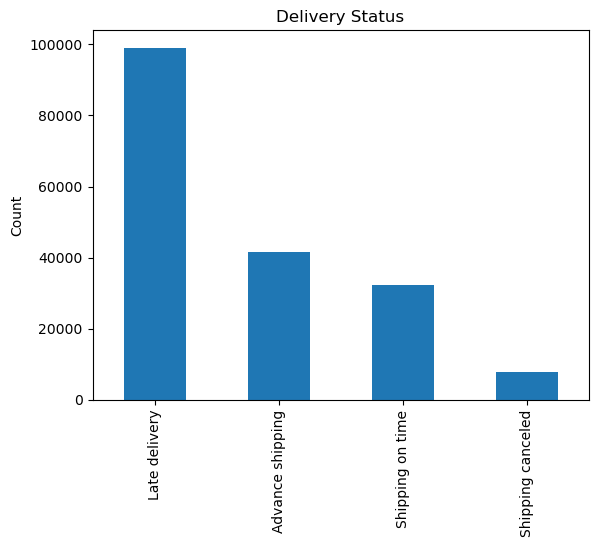

In [27]:
df["Delivery Status"].value_counts().plot(kind='bar', title="Delivery Status", ylabel="Count")

For the baseline model, I will want a binary variable. From understanding the target variables, we can modify the four variables into two: **Successful Delivery** and **Failed Delivery**

To elaborate, a **Successful Delivery** is defined as **an order delivered by the promised time** meaning that it can be early, representing `Advance shipping`, or right on the promised day, representing `Shipping on time`. On the other hand, a **Failed Delivery** is defined as **an order delivered pass the promised time or not delivered at all** meaning that it is delivered late, representing `Late delivery`, or it got canceled, representing `Shipping canceled`. 

Hence, I am going to combine the target variables like such:
1. `Successful Delivery` = Advance shipping + Shipping on time
2. `Failed Delivery` = Late delivery + Shipping canceled

In [28]:
#using map function to replace the variable names to its new identity.
df["Delivery Status"] = df["Delivery Status"].map({'Advance shipping': 'Succesful Delivery', 
                                                   'Shipping on time': 'Succesful Delivery',
                                                   'Late delivery' : 'Failed Delivery',
                                                   'Shipping canceled' : 'Failed Delivery'
                                                  })

In [29]:
#sanity check: now delivery status has only two unique variables: Successful Delivery and Failed Delivery
df["Delivery Status"].unique()

array(['Succesful Delivery', 'Failed Delivery'], dtype=object)

We have successfuly made out target variable binary! Now, I am going to represent the variable numerically by converting it to 0s and 1.

- Successful Delivery = 1
- Failed Delivery = 0

In [30]:
#using map function to convert Delivery Status column into binary numbers of 0s and 1s.
df["Delivery Status"] = df["Delivery Status"].map({'Succesful Delivery': 1, 
                                                   'Failed Delivery' : 0})

In [31]:
#sanity check: only 1 and 0.
df["Delivery Status"].unique()

array([1, 0], dtype=int64)

Now, the `Delivery Status` column is represented in binary numbers where 1s represent Successful Delivery and 0s represent Failed Delivery. The column is also now an **int64 data type**!

<AxesSubplot: title={'center': 'Proportion of Delivery Status'}, ylabel='Proportion'>

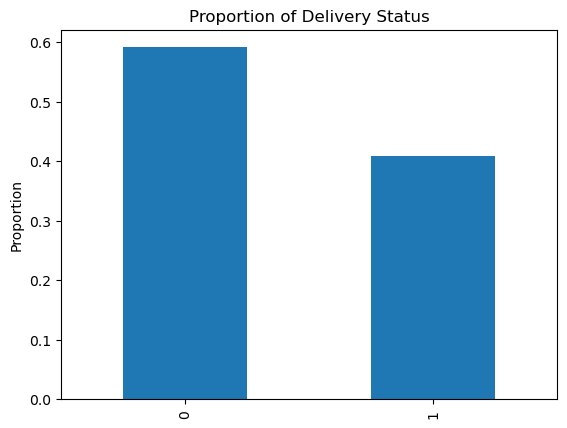

In [32]:
#plot the proportion of Delivery Status
(df["Delivery Status"].value_counts()/df.shape[0]).plot(kind='bar', title="Proportion of Delivery Status", ylabel="Proportion")

In [33]:
#getting the porportion values
df["Delivery Status"].value_counts()/df.shape[0]

0    0.59125
1    0.40875
Name: Delivery Status, dtype: float64

Now, out target variable looks more balanced than before where we had class imbalances! About **59% of the order items are successfully delivered and about 41% are failed to be delivered**. Though, there is still some class imbalance here!

##### Features

Now, I am going to represent all columns numerically.

Let's extract the column names of non-numeric columns

In [34]:
#return only non-numeric column names
non_numeric = df.select_dtypes("object").columns
non_numeric

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Id', 'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Department Name', 'Market', 'Order City',
       'Order Country', 'Order Id', 'Order Region', 'Order State',
       'Order Status', 'Product Name', 'Shipping Mode'],
      dtype='object')

In [35]:
#gets the number of unique values in each non_numeric columns
df[non_numeric].nunique().sort_values()

Customer Country        2
Customer Segment        3
Type                    4
Shipping Mode           4
Market                  5
Order Status            9
Department Name        11
Order Region           23
Customer State         44
Category Name          50
Product Name          118
Order Country         164
Customer City         562
Customer Zipcode      995
Order State          1089
Order City           3597
Customer Street      7456
Customer Id         20649
Order Id            65749
dtype: int64

I will drop `Customer Id` and `Order Id` due to its redundancy and number of unique values that it has which makes it hard to represent numerically. I am also going to drop `Product Name`, `Customer Street` `Order State`, `Order City`, `Order Country`, `Customer Zipcode`, and `Customer City` because it also holds a lot of unique values and there are other columns generalizes the details those columns entail such as Category Name, Customer State, and Order Region.

In [36]:
#dropping the nine features
df.drop(["Product Name", "Customer Id", "Order Id", "Customer Street", "Order City", "Order State", "Customer Zipcode", "Customer City", "Order Country"], inplace=True, axis=1)

In [37]:
#view non-numeric columns
non_numeric = df.select_dtypes("object").columns
df[non_numeric].nunique().sort_values()

Customer Country     2
Customer Segment     3
Type                 4
Shipping Mode        4
Market               5
Order Status         9
Department Name     11
Order Region        23
Customer State      44
Category Name       50
dtype: int64

We are left with 10 non-numeric features. I am going to try to reduce the number of unique values in features that has more than 10 unique values. I am going to start with `Category Name`.

<AxesSubplot: title={'center': 'Top 15 Category Names Ordered'}, ylabel='Count'>

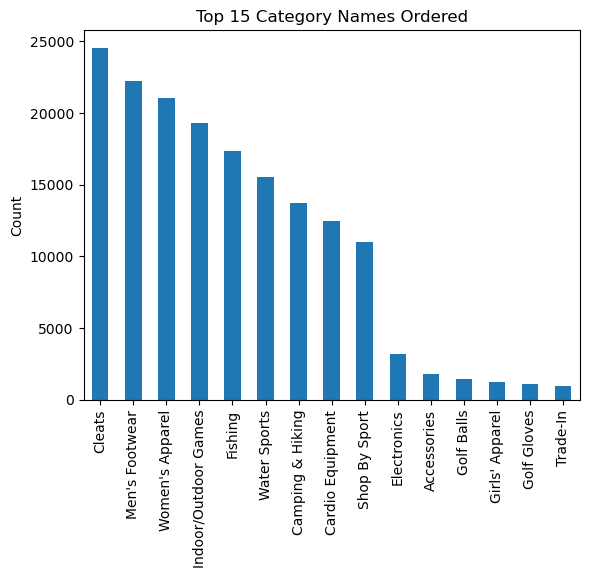

In [38]:
#view top 15 category names in terms of count.
df["Category Name"].value_counts().head(15).plot(kind="bar", title="Top 15 Category Names Ordered", ylabel="Count")

As you can see, after the top 9th product, the count of order items drop significantly. I will consolidate the variables with small frequencies into a variable called "Other Categories".

Let's view the categories above top 9:

In [39]:
#viewing categories above top 9
other = df["Category Name"].value_counts(ascending=True).head(50-9)
other

Golf Bags & Carts         61
Basketball                67
As Seen on  TV!           68
Strength Training        111
Soccer                   138
Women's Golf Clubs       181
Baby                     207
Men's Clothing           208
CDs                      271
Men's Golf Clubs         283
Fitness Accessories      309
Tennis & Racquet         328
Lacrosse                 343
Sporting Goods           357
Health and Beauty        362
Kids' Golf Clubs         384
Books                    405
Boxing & MMA             423
Consumer Electronics     430
Music                    434
Hunting & Shooting       440
Golf Apparel             441
Computers                442
DVDs                     483
Crafts                   484
Garden                   484
Pet Supplies             492
Golf Shoes               524
Toys                     529
Cameras                  592
Hockey                   614
Baseball & Softball      632
Women's Clothing         650
Children's Clothing      651
Video Games   

In [40]:
#consolidate the 41 category names into "Others"
df["Category Name"] = np.where(df["Category Name"].isin(other.index),"Others Categories", df['Category Name'])

<AxesSubplot: title={'center': 'Category Names'}, ylabel='Count'>

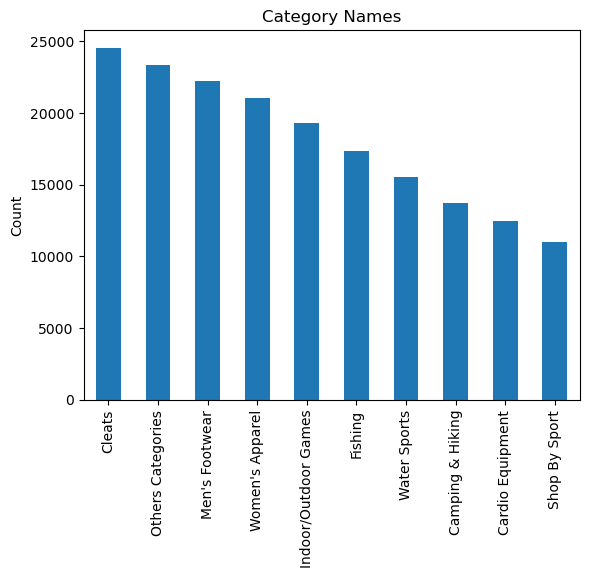

In [41]:
#view all category names in terms of count.
df["Category Name"].value_counts().plot(kind="bar", title="Category Names", ylabel="Count")

Now we have 10 categories for the `Category Name` feature, and the **Other Categories** variable that we just made is the second most frequent.

In [42]:
#view non-numeric columns
non_numeric = df.select_dtypes("object").columns
df[non_numeric].nunique().sort_values()

Customer Country     2
Customer Segment     3
Type                 4
Shipping Mode        4
Market               5
Order Status         9
Category Name       10
Department Name     11
Order Region        23
Customer State      44
dtype: int64

Let's do the same thing to `Customer State`

<AxesSubplot: title={'center': 'Top 15 Customer States'}, ylabel='Count'>

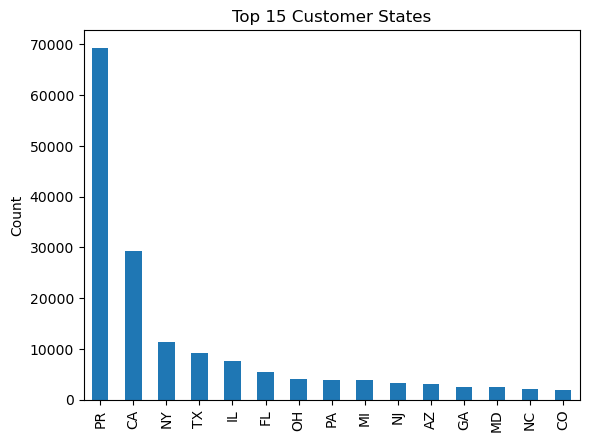

In [43]:
df["Customer State"].value_counts().head(15).plot(kind='bar',title="Top 15 Customer States", ylabel='Count')

In [44]:
#viewing customer states above top 2
other = df["Customer State"].value_counts(ascending=True).head(44-2)
other

AL       35
IA       67
MT       87
AR      164
ID      167
ND      215
OK      232
WV      241
RI      243
DE      269
KS      458
KY      487
DC      579
IN      581
SC      665
MN      672
WI      850
WA      920
LA      948
NM      949
UT      968
CT     1094
HI     1248
MO     1354
NV     1440
TN     1582
MA     1607
OR     1668
VA     1849
CO     1914
NC     1992
MD     2415
GA     2503
AZ     3026
NJ     3191
MI     3804
PA     3824
OH     4095
FL     5456
IL     7631
TX     9103
NY    11327
Name: Customer State, dtype: int64

In [45]:
#consolidate the 42 customer states into "Others"
df["Customer State"] = np.where(df["Customer State"].isin(other.index),"Others States", df['Customer State'])

<AxesSubplot: title={'center': 'Customer States'}, ylabel='Count'>

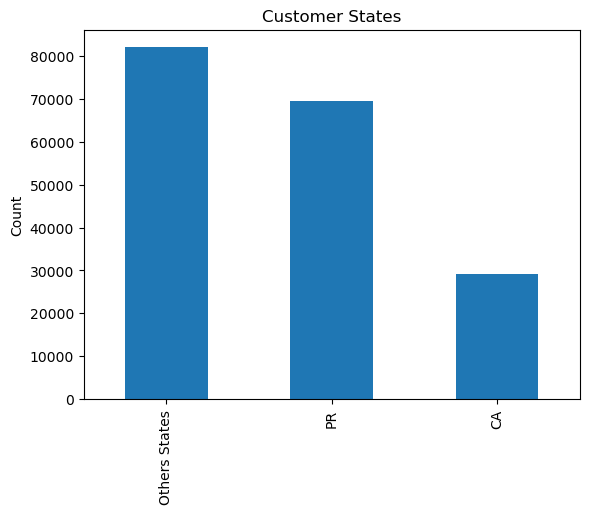

In [46]:
#view all category names in terms of count.
df["Customer State"].value_counts().plot(kind="bar", title="Customer States", ylabel="Count")

Now we have 3 state for the `Customer State` feature, and the **Other States** variable that we just made is the most frequent.

In [47]:
#view non-numeric columns
non_numeric = df.select_dtypes("object").columns
df[non_numeric].nunique().sort_values()

Customer Country     2
Customer Segment     3
Customer State       3
Type                 4
Shipping Mode        4
Market               5
Order Status         9
Category Name       10
Department Name     11
Order Region        23
dtype: int64

<AxesSubplot: title={'center': 'Order Region'}, ylabel='Count'>

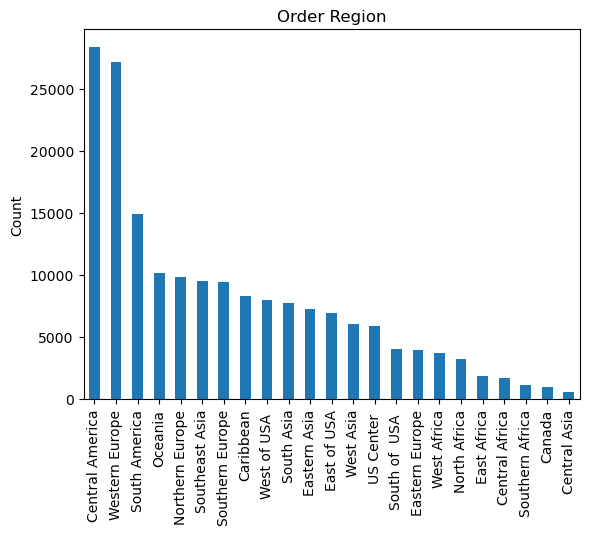

In [48]:
#view all order regions in terms of count.
df["Order Region"].value_counts().plot(kind="bar", title="Order Region", ylabel="Count")

Here I notice that we can consolidate the variables into continental regions. For example, East Africa, Central Africa, and other African regions can be made into one variable, "Africa".

In [49]:
#lists all african region
africa = ["Central Africa","East Africa","Southern Africa","North Africa","West Africa"]
#lists all north american region
na = ["West of USA ", "East of USA", "South of  USA ", "US Center ", "Canada"]
#lists all asian region
asia = ["Southeast Asia", "Eastern Asia", "West Asia", "Central Asia", "South Asia"]
#lists all central america region
ca = ["Caribbean"]

In [50]:
#consolidate the african regions into "Africa"
df["Order Region"] = np.where(df["Order Region"].isin(africa), "Africa",df["Order Region"])
#consolidate the north american regions into "North America"
df["Order Region"] = np.where(df["Order Region"].isin(na), "North America",df["Order Region"])
#consolidate the asian regions into "Asia"
df["Order Region"] = np.where(df["Order Region"].isin(asia), "Asia",df["Order Region"])
#consolidate the central america regions into "Central America"
df["Order Region"] = np.where(df["Order Region"].isin(ca), "Central America",df["Order Region"])

<AxesSubplot: title={'center': 'Order Region'}, ylabel='Count'>

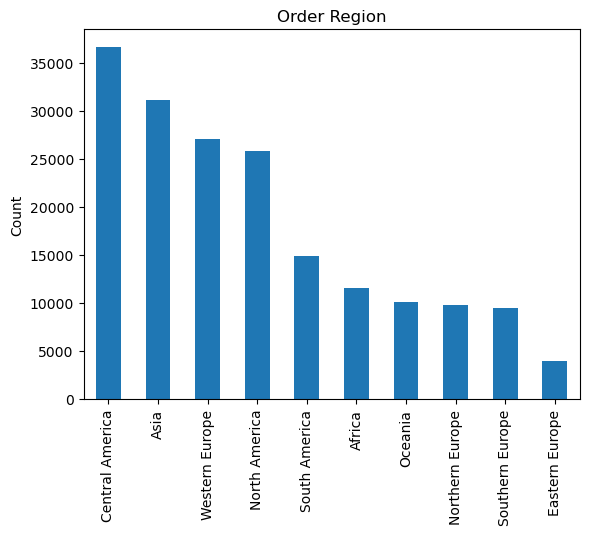

In [51]:
#view all order regions in terms of count.
df["Order Region"].value_counts().plot(kind="bar", title="Order Region", ylabel="Count")

After consolidating the variables, we now have 10 unique variables in the `Order Region` column!

In [52]:
#view non-numeric columns
non_numeric = df.select_dtypes("object").columns
df[non_numeric].nunique().sort_values()

Customer Country     2
Customer Segment     3
Customer State       3
Type                 4
Shipping Mode        4
Market               5
Order Status         9
Category Name       10
Order Region        10
Department Name     11
dtype: int64

Let's move on to `Department Name`

<AxesSubplot: title={'center': 'Department Name'}, ylabel='Count'>

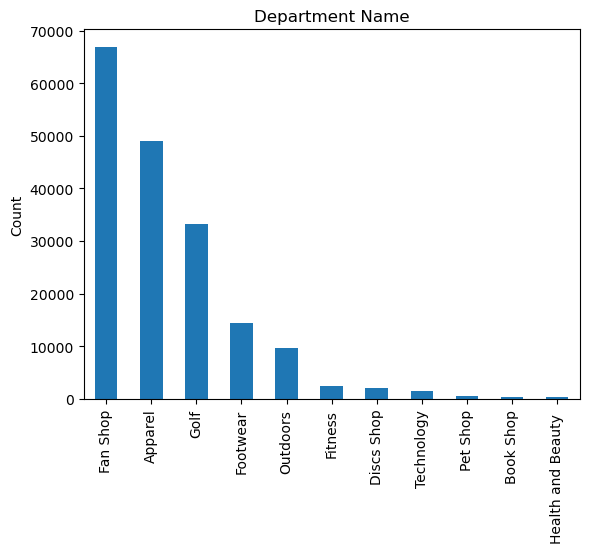

In [53]:
#view all Department Names in terms of count.
df["Department Name"].value_counts().plot(kind='bar', title="Department Name", ylabel="Count")

Here, I am going to consolidate the variables above the top 4

In [54]:
#viewing Department Name above top 5
other = df["Department Name"].value_counts(ascending=True).head(11-5)
other

Health and Beauty      362
Book Shop              405
Pet Shop               492
Technology            1464
Discs Shop            2025
Fitness               2479
Name: Department Name, dtype: int64

In [55]:
#consolidate the variables above top 5
df["Department Name"] = np.where(df["Department Name"].isin(other.index), "Other Departments",df["Department Name"])

<AxesSubplot: title={'center': 'Department Name'}, ylabel='Count'>

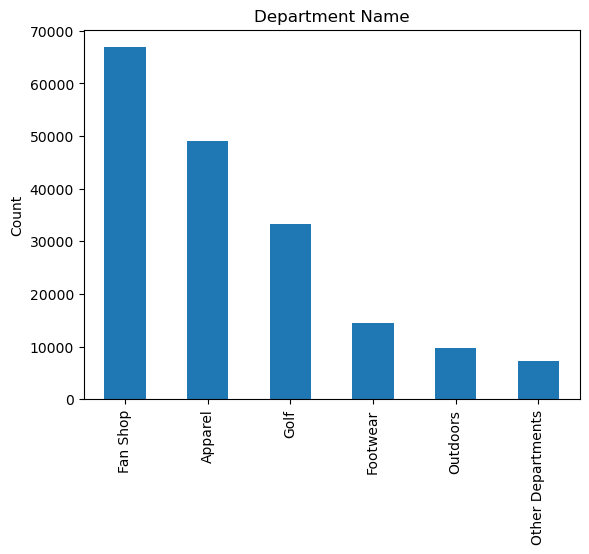

In [56]:
#view all Department Names in terms of count.
df["Department Name"].value_counts().plot(kind='bar', title="Department Name", ylabel="Count")

Now we have only 6 variables for `Department Name`

In [57]:
#view all non_numeric columns
non_numeric = df.select_dtypes("object").columns
df[non_numeric]

,Type,Category Name,Customer Country,Customer Segment,Customer State,Department Name,Market,Order Region,Order Status,Shipping Mode
Order Item Id,,,,,,,,,,
180517,DEBIT,Others Categories,Puerto Rico,Consumer,PR,Other Departments,Pacific Asia,Asia,COMPLETE,Standard Class
179254,TRANSFER,Others Categories,Puerto Rico,Consumer,PR,Other Departments,Pacific Asia,Asia,PENDING,Standard Class
179253,CASH,Others Categories,EE. UU.,Consumer,CA,Other Departments,Pacific Asia,Asia,CLOSED,Standard Class
179252,DEBIT,Others Categories,EE. UU.,Home Office,CA,Other Departments,Pacific Asia,Oceania,COMPLETE,Standard Class
179251,PAYMENT,Others Categories,Puerto Rico,Corporate,PR,Other Departments,Pacific Asia,Oceania,PENDING_PAYMENT,Standard Class
...,...,...,...,...,...,...,...,...,...,...
65177,CASH,Fishing,EE. UU.,Home Office,Others States,Fan Shop,Pacific Asia,Asia,CLOSED,Standard Class
65161,DEBIT,Fishing,EE. UU.,Corporate,CA,Fan Shop,Pacific Asia,Asia,COMPLETE,Second Class
65129,TRANSFER,Fishing,EE. UU.,Corporate,Others States,Fan Shop,Pacific Asia,Oceania,PENDING,Standard Class


In [58]:
df[non_numeric].nunique().sort_values()

Customer Country     2
Customer Segment     3
Customer State       3
Type                 4
Shipping Mode        4
Market               5
Department Name      6
Order Status         9
Category Name       10
Order Region        10
dtype: int64

##### Representing the Non-Numerical Features in Numbers 

Here, I am going to represent each non-numerical features with 1s and 0s by using the `get_dummies` function.

In [59]:
df = pd.get_dummies(data=df,columns=non_numeric, drop_first=True)

In [60]:
df

,Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Latitude,Longitude,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,...,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
Order Item Id,,,,,,,,,,,,,,,,,,,,,
180517,4,91.250000,314.640015,1,18.251453,-66.037056,2018-01-31 22:56:00,13.110000,0.04,0.29,...,1,0,0,0,0,0,0,0,0,1
179254,4,-249.089996,311.359985,0,18.279451,-66.037064,2018-01-13 12:27:00,16.389999,0.05,-0.80,...,0,0,0,1,0,0,0,0,0,1
179253,4,-247.779999,309.720001,1,37.292233,-121.881279,2018-01-13 12:06:00,18.030001,0.06,-0.80,...,0,0,0,0,0,0,0,0,0,1
179252,4,22.860001,304.809998,1,34.125946,-118.291016,2018-01-13 11:45:00,22.940001,0.07,0.08,...,1,0,0,0,0,0,0,0,0,1
179251,4,134.210007,298.250000,1,18.253769,-66.037048,2018-01-13 11:24:00,29.500000,0.09,0.45,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65177,4,40.000000,399.980011,1,40.640930,-73.942711,2016-01-16 03:40:00,0.000000,0.00,0.10,...,0,0,0,0,0,0,0,0,0,1
65161,2,-613.770019,395.980011,0,35.362545,-119.018700,2016-01-16 01:34:00,4.000000,0.01,-1.55,...,1,0,0,0,0,0,0,0,1,0
65129,4,141.110001,391.980011,0,41.629959,-72.967155,2016-01-15 21:00:00,8.000000,0.02,0.36,...,0,0,0,1,0,0,0,0,0,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180516 entries, 180517 to 65113
Data columns (total 61 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Days for shipment (scheduled)       180516 non-null  int64         
 1   Benefit per order                   180516 non-null  float64       
 2   Sales per customer                  180516 non-null  float64       
 3   Delivery Status                     180516 non-null  int64         
 4   Latitude                            180516 non-null  float64       
 5   Longitude                           180516 non-null  float64       
 6   order date (DateOrders)             180516 non-null  datetime64[ns]
 7   Order Item Discount                 180516 non-null  float64       
 8   Order Item Discount Rate            180516 non-null  float64       
 9   Order Item Profit Ratio             180516 non-null  float64       
 10  Orde

Now I am going to deal with the **datetime** columns

##### Datetime

We have two datetime columns: `order date (DateOrders)` and `shipping date (DateOrders)`. We have to drop `shipping date (DateOrders)` because it is the exact date and time of the shipment. We want to have the model that is able to predict the outcome of the deliveries before it is shipped, so, in practice, we would not have the actual information of the shipment in our prediction.

In [62]:
#drops the shipping date feature
df.drop("shipping date (DateOrders)", inplace=True, axis=1)

For the `order date (DateOrders)` column, I am going make **month and year** features out of it.

In [63]:
#makes order month feature
df["order_month"] = df["order date (DateOrders)"].dt.month
#makes order year feature
df["order_year"] = df["order date (DateOrders)"].dt.year

In [64]:
#dropping order date (DateOrders) because it is not redundant
df.drop("order date (DateOrders)", axis=1, inplace=True)

In [65]:
#sanity check: 61 columns
df.shape

(180516, 61)

In [66]:
#view data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180516 entries, 180517 to 65113
Data columns (total 61 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Days for shipment (scheduled)       180516 non-null  int64  
 1   Benefit per order                   180516 non-null  float64
 2   Sales per customer                  180516 non-null  float64
 3   Delivery Status                     180516 non-null  int64  
 4   Latitude                            180516 non-null  float64
 5   Longitude                           180516 non-null  float64
 6   Order Item Discount                 180516 non-null  float64
 7   Order Item Discount Rate            180516 non-null  float64
 8   Order Item Profit Ratio             180516 non-null  float64
 9   Order Item Quantity                 180516 non-null  int64  
 10  Sales                               180516 non-null  float64
 11  Order Item Total      

Now, all of our features are represented numerically!

## Saving the Data

Now that we have processed our data for baseline modelling, we can move on to the actual modelling!

In [67]:
df.to_csv('Datasets\preprocessed_DataCoSupplyChainDataset.csv', index=False)